In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
import seaborn as sns
import matplotlib.pyplot as plt


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [2]:
df = pd.read_csv("email.csv")

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
total_stop_words = (
    stopwords.words("english")
    + stopwords.words("spanish")
    + stopwords.words("french")
    + ["ur","im","dont","doin","ure","2","4","r","u","n","lt","gt","amp","ok","pls","v","c","n","b","wk","th","nd","st","rd","th","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z","ab","ac","ad","ae","af","ag","ah","ai","aj","ak","al","am","an","ao","ap","aq","ar","as","at","au","av","aw","ax","ay","az","ba","bb","bc","bd","be","bf","bg","bh","bi","bj","bk","bl","bm","bn","bo","bp","bq","br","bs","bt","bu","bv","bw","bx","by","bz","ca","cb","cc","cd","ce","cf","cg","ch","ci","cj","ck","cl","cm","cn","co","cp","cq","cr","cs","ct","cu","cv","cw","cx","cy","cz","da","db","dc","dd","de","df","dg","dh","di","dj","dk","dl","dm","dn","do","dp","dq","dr","ds","dt","du","dv","dw","dx","dy","dz","ea","eb","ec","ed","ee","ef","eg","eh","ei","ej","ek","el","em","en","eo","ep","eq","er","es","et","eu","ev","ew","ex","ey","ez","fa","fb","fc","fd","fe","ff","fg","fh","fi","fj","fk","fl","fm","fn","fo","fp","fq","fr","fs","ft","fu","fv","fw","fx","fy","fz","ga","gb","gc","gd","ge","gf","gg","gh","gi","gj","gk","gl","gm","gn","go","gp","gq","gr","gs","gt","gu","gv","gw","gx","gy","gz","ha","hb","hc","hd","he","hf","hg","hh","hi","hj","hk","hl","hm","hn","ho","hp","hq","hr","hs","ht"]
)
total_stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [5]:
def clean_text(text):
    text = re.sub(r'[^\w\s]','',text,re.UNICODE)
    text = text.lower()
    text = [word for word in text.split() if word not in total_stop_words]
    text = " ".join(text)
    return text

In [6]:
df["Message"] = df["Message"].apply(clean_text)

In [7]:
df


,Category,Message
0,ham,jurong point crazy available bugis great world...
1,ham,lar joking wif oni
2,spam,free entry wkly comp win cup final tkts 21st m...
3,ham,dun say early hor already say
4,ham,nah think goes usf lives around though
...,...,...
5568,ham,ü going esplanade home
5569,ham,pity mood soany suggestions
5570,ham,guy bitching acted like id interested buying s...
5571,ham,rofl true name


In [8]:
df.describe()

,Category,Message
count,5573,5573
unique,3,5097
top,ham,
freq,4825,30


<Axes: xlabel='Category', ylabel='count'>

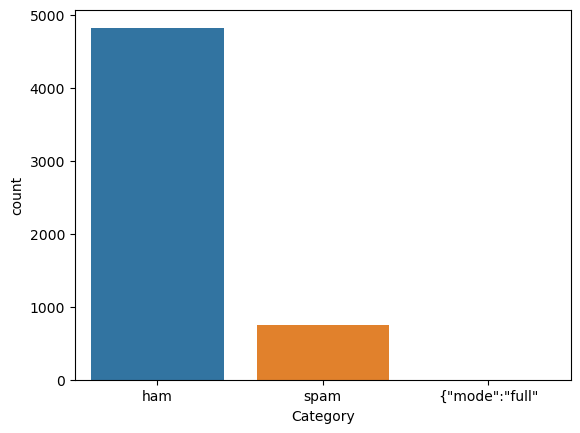

In [9]:
sns.barplot(x=df["Category"].value_counts().index, y=df["Category"].value_counts())

In [10]:
df["Category"].value_counts()

Category
ham               4825
spam               747
{"mode":"full"       1
Name: count, dtype: int64

In [11]:
df["Category"].value_counts()[1]

747

In [12]:
df["Category"].value_counts().sum()

5573

In [13]:
Percentage_of_spam = (df["Category"].value_counts()[1]/df["Category"].value_counts().sum())*100
Percentage_of_ham = (df["Category"].value_counts()[0]/df["Category"].value_counts().sum())*100
print(f"Percentage of spam is {Percentage_of_spam:0.2f}%", f"Percentage of ham is {Percentage_of_ham:0.2f}%")

Percentage of spam is 13.40% Percentage of ham is 86.58%


call 575
get 386
free 275
ltgt 258
know 257
like 244
ill 243
got 239
good 236
come 229
time 208
day 203
love 200
want 193
send 191
text 188
going 171
one 171
need 167
txt 163


<Axes: xlabel='word', ylabel='freq'>

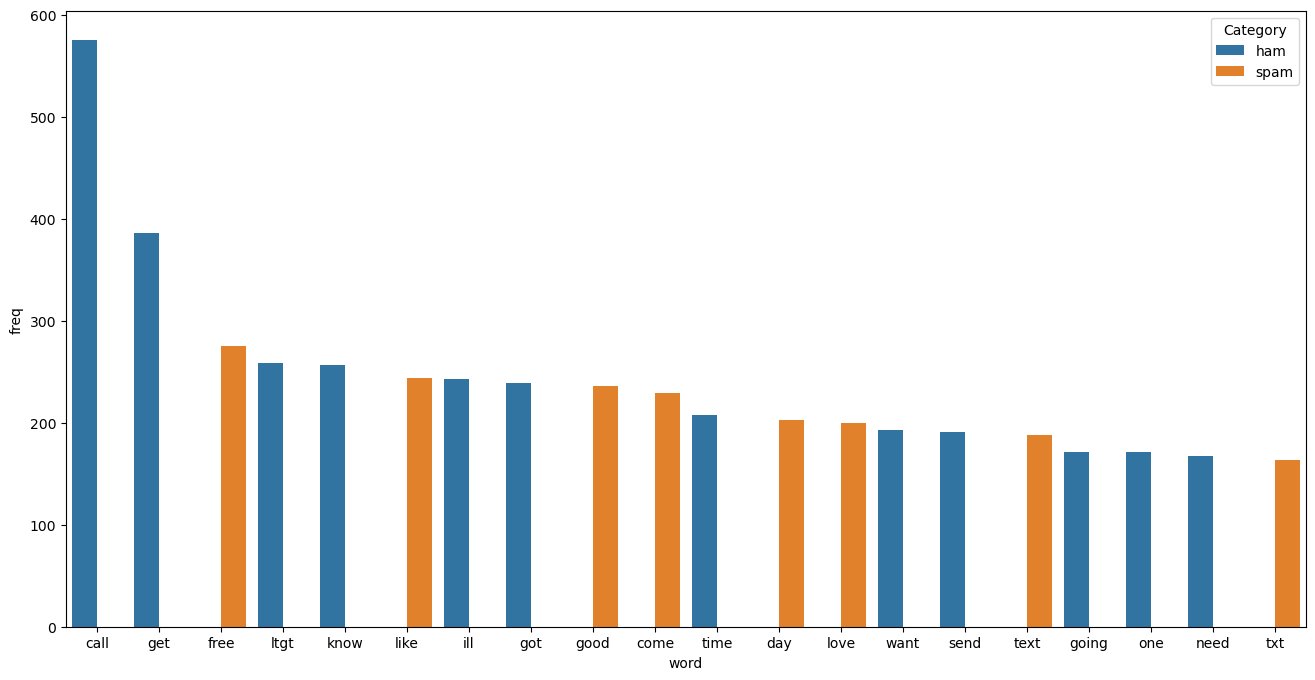

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['Message'], 20)
for word, freq in common_words:
    print(word, freq)
# Plot the most common words
top_words = pd.DataFrame(common_words, columns=["word", "freq"])
fix,ax = plt.subplots(figsize=(16,8))
top_words["Category"] = df["Category"].astype(str)
sns.barplot(x="word", y="freq", data=top_words, hue="Category")

In [15]:
from sklearn.model_selection import train_test_split
X = df["Message"]
y = df["Category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [17]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train = tfidf_transformer.fit_transform(X_train)
X_test = tfidf_transformer.transform(X_test)

In [18]:
X_train = pd.DataFrame(X_train.toarray())
X_test = pd.DataFrame(X_test.toarray())

In [19]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_score = logistic_model.score(X_test, y_test)
print(f"Logistic Regression Model Accuracy: {logistic_score:0.1%}")

Logistic Regression Model Accuracy: 96.8%


In [20]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_score = svm_model.score(X_test, y_test)
print(f"Support Vector Machine Model Accuracy: {svm_score:0.1%}")


Support Vector Machine Model Accuracy: 97.8%


In [21]:
logistic_predictions = logistic_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)


# Confusion Matrix
from sklearn.metrics import confusion_matrix
logistic_confusion_matrix = confusion_matrix(y_test, logistic_predictions)
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)

Text(927.1928104575164, 0.5, 'Actual')

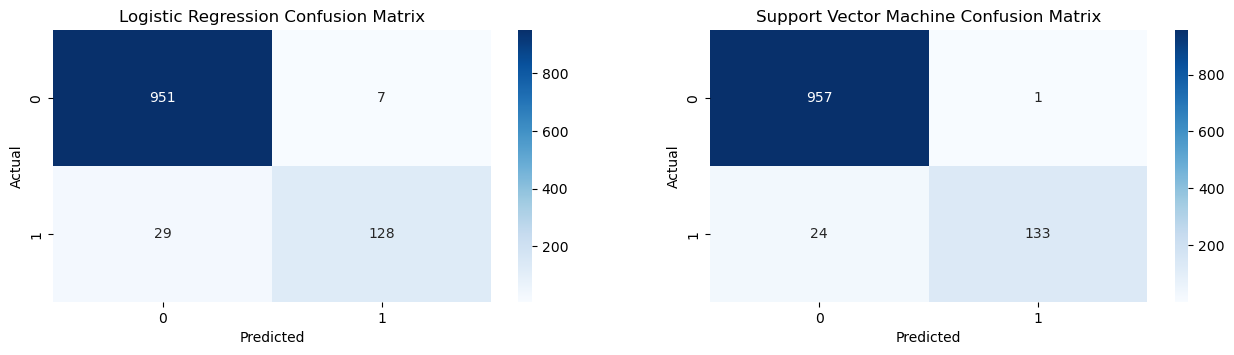

In [22]:
plt.figure(figsize=(24, 12))
# Add axis


plt.subplot(3, 3, 1)
sns.heatmap(logistic_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")



plt.subplot(3, 3, 2)
sns.heatmap(svm_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Support Vector Machine Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")



In [23]:
def predict_text(text):
    text = clean_text(text)
    text = vectorizer.transform([text])
    text = tfidf_transformer.transform(text)
    text = pd.DataFrame(text.toarray())
    logistic_prediction = logistic_model.predict(text)
    svm_prediction = svm_model.predict(text)
    
    return logistic_prediction[0], svm_prediction[0]

# Example 1
text = "Congratulations! You have won a free ticket to the Bahamas. Text 'WIN' to 12345 to claim it.\n"
print(text)
logistic_prediction, svm_prediction = predict_text(text)
print(f"Logistic Regression Prediction: {logistic_prediction}")
print(f"Support Vector Machine Prediction: {svm_prediction}\n")


# Example 2
text = "Hello, how are you doing today?\n"
print(text)
logistic_prediction, svm_prediction = predict_text(text)
print(f"Logistic Regression Prediction: {logistic_prediction}")
print(f"Support Vector Machine Prediction: {svm_prediction}")

Congratulations! You have won a free ticket to the Bahamas. Text 'WIN' to 12345 to claim it.

Logistic Regression Prediction: spam
Support Vector Machine Prediction: spam

Hello, how are you doing today?

Logistic Regression Prediction: ham
Support Vector Machine Prediction: ham


In [24]:
import streamlit as st
import pickle

In [31]:
spam = open("classifier.pkl","rb")

In [33]:
vectorizer = open("vectorizer.pkl","rb")

In [32]:
with open("vectorizer.pkl","wb") as files:
    pickle.dump(df,files)

In [41]:
def main(title="Text classification App".upper()):
    st.markdown("<h1 style='text-align': center; font-size: 25px; color: blue;'>{}</h1>".format(title), unsafe_allow_html=True)
    info = " "
    
    with st.expander("1. check if your text is a spam or not spam "):
        text_message = st.text_input("Please enter your message")
        if st.button("Predicdt"):
            prediction = spam_clif.predict(vectorizer.transform([text_message]))
            
            if(prediction[0] == 0):
                info = "NOT SPAM"
                
            else:
                info = "SPAM"
            st.success("Prediction: {}".format(info))


    

In [42]:
if __name__=="__main__":
    main()

2024-07-06 13:30:56.628 
  command:

    streamlit run C:\Users\admin\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
